<h3>Mersad Mostofian | 401243124</h3>

<a href="https://quera.org/course/assignments/71713/problems">ترکیب هواشناسی و جنگ جهانی</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>خواندن فایل ها</h1>
<h4>فایل های دیتا رو از <a href="https://drive.google.com/file/d/1mmiCWaRRx7MiC-TfG1A3OY2H3g5atPcw/view?usp=sharing">این لینک</a>   دانلود می کنیم</h4>

In [2]:
weatherSummery = pd.read_csv("Summary of Weather.csv")
stationLoc = pd.read_csv("Weather Station Locations.csv")

C:\Users\Mersad\AppData\Local\Temp\ipykernel_9392\1248487472.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weatherSummery = pd.read_csv("Summary of Weather.csv")


<p>از هر دیتاست 10 دیتا اول رو میخوانیم تا با ستون ها و نوع متغییر ها آشنا شویم</p>

In [3]:
weatherSummery.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stationLoc.head(10)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
5,11604,ST JOHNS/COOLIDGE FIELD,AT,1707N,06147W,10,17.116667,-61.733333
6,82502,AMBERLY,AU,2736S,15243E,27,-27.600000,152.816667
7,82501,ARCHER,AU,2735S,15301E,19,-27.583333,153.000000
8,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
9,82402,CHARLEVILLE,AU,2625S,14616E,300,-26.416667,146.216667


<h3>بررسی روابط ستون ها و میزان تاثیر آنها روی یکدیگر</h3>
<h4>ستون های 2 تا 5 </h4>
<h4>(Precip تا MinTemp) داده ها را در نظر میگیریم</h4>

<h4>چون در ستون اول در بین داده ها  یک رشته وجود دارد آن را با مقدار کمی جایگزین میکنیم.
</h4>

In [5]:
four_data = weatherSummery.iloc[:,2:6]
four_data['Precip'] = four_data['Precip'].replace('T',0.25)
four_data.head(10)

,Precip,WindGustSpd,MaxTemp,MinTemp
0,1.016,NaN,25.555556,22.222222
1,0,NaN,28.888889,21.666667
2,2.54,NaN,26.111111,22.222222
3,2.54,NaN,26.666667,22.222222
4,0,NaN,26.666667,21.666667
5,0,NaN,26.666667,21.666667
6,0.25,NaN,28.333333,22.777778
7,3.556,NaN,26.666667,22.222222
8,0.25,NaN,27.222222,22.777778
9,3.556,NaN,25.555556,21.666667


<h2>محاسبه ماتریس همبستگی (correlation matrix) </h2>

<h4>قطر اصلی ماتریس زیر برامون مهم نیست مهم ارتباط بین ویژگی های غیر یکسان است هر جا عدد به 1 میل کنه همبستگی بیشتره و هر جا به -1 همبستگی کمتره</h4>

In [6]:
df_corr = four_data.corr()
df_corr

,Precip,WindGustSpd,MaxTemp,MinTemp
Precip,1.000000,0.341275,0.003979,0.088569
WindGustSpd,0.341275,1.000000,-0.124238,0.311690
MaxTemp,0.003979,-0.124238,1.000000,0.878384
MinTemp,0.088569,0.311690,0.878384,1.000000


<h3>heatmapرسم جدول</h3>
<h4>پر رنگ بودن نشانه همبستگی بیشتر است</h4>

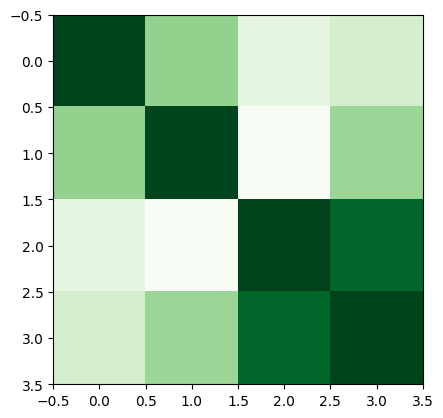

In [7]:
plt.imshow(df_corr,cmap='Greens')

<h4>با توجه به 2 بلوک قبل MaxTemp و MinTemp بیشترین همبستگی رو در بین دیگر ویژگی ها نسبت به هم داشتند</h4>

<h2>رسم این دو ویژگی</h2>
<h3>با توجه به خروجی نمودار میبینیم تعدادی داده پرت وجود دارد در ادامه میبینیم چه تاثیری در یافتن خط فیت دارد.</h3>

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

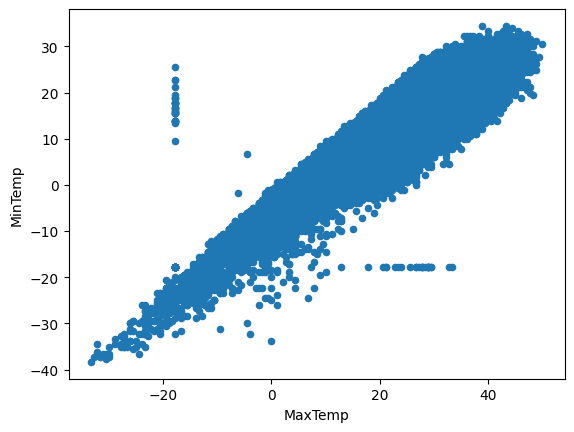

In [8]:
weatherSummery.plot.scatter(x='MaxTemp',y='MinTemp')

<h2>توابع مورد نیاز رگراسیون خطی</h2>

In [9]:
def normalize(t):
    return (t - np.min(t)) / (np.max(t) - np.min(t))

In [10]:
def update(dataset,t,w,b,alpha):
    n = len(dataset)
    y = np.dot(w,dataset) + b
    w_new = (alpha/n) * np.sum(np.dot((y-t),dataset))
    b_new = (alpha/n) * np.sum(y-t)
    w -= w_new
    b -= b_new
    return w,b
    
    

In [11]:
def cal_cost(dataset,t,w,b):
    return (1/(2*len(dataset))) * np.sum(np.square((np.dot(w,dataset)+b)-t))


In [12]:
def find_line(dataset,t,w,b,alpha,iter):
    for i in range(iter):
        w,b = update(dataset,t,w,b,alpha)
        if i % 1000 == 0:
            print(f"iter: {i} , cost: {cal_cost(dataset,t,w,b)}")
    return w,b

<h3>
iter = 10000
پیدا کردن خط فیت با
</h3>

In [13]:
w,b = 0,0
alpha = 0.001
iter = 10000
x = weatherSummery["MaxTemp"]
t = normalize(weatherSummery["MinTemp"])
w,b = find_line(x,t,w,b,alpha,iter)

iter: 0 , cost: 0.022120887974026275
iter: 1000 , cost: 0.009682720385537791
iter: 2000 , cost: 0.008279661023596596
iter: 3000 , cost: 0.007117119922314493
iter: 4000 , cost: 0.006153866442931881
iter: 5000 , cost: 0.005355737873955334
iter: 6000 , cost: 0.004694427817722942
iter: 7000 , cost: 0.004146482276774724
iter: 8000 , cost: 0.0036924678352651184
iter: 9000 , cost: 0.0033162824341711173


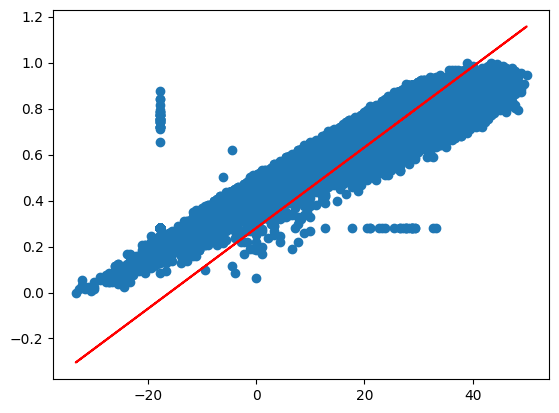

In [14]:
plt.scatter(x,t)
y = np.dot(w,x) + b
plt.plot(x,y,'r')
plt.show()

<h3>
iter = 100000
پیدا کردن خط فیت با
</h3>

In [15]:
w,b = 0,0
alpha = 0.001
iter = 100000
x = weatherSummery["MaxTemp"]
t = normalize(weatherSummery["MinTemp"])
w,b = find_line(x,t,w,b,alpha,iter)

iter: 0 , cost: 0.022120887974026275
iter: 1000 , cost: 0.009682720385537791
iter: 2000 , cost: 0.008279661023596596
iter: 3000 , cost: 0.007117119922314493
iter: 4000 , cost: 0.006153866442931881
iter: 5000 , cost: 0.005355737873955334
iter: 6000 , cost: 0.004694427817722942
iter: 7000 , cost: 0.004146482276774724
iter: 8000 , cost: 0.0036924678352651184
iter: 9000 , cost: 0.0033162824341711173
iter: 10000 , cost: 0.003004584296275504
iter: 11000 , cost: 0.002746318747200361
iter: 12000 , cost: 0.0025323261507434144
iter: 13000 , cost: 0.0023550170535665935
iter: 14000 , cost: 0.002208103017930863
iter: 15000 , cost: 0.0020863735962010025
iter: 16000 , cost: 0.0019855115373067435
iter: 17000 , cost: 0.0019019396712794245
iter: 18000 , cost: 0.0018326940414771454
iter: 19000 , cost: 0.0017753187850105042
iter: 20000 , cost: 0.0017277790332021477
iter: 21000 , cost: 0.0016883887430112115
iter: 22000 , cost: 0.001655750899894554
iter: 23000 , cost: 0.0016287079713417604
iter: 24000 , cos

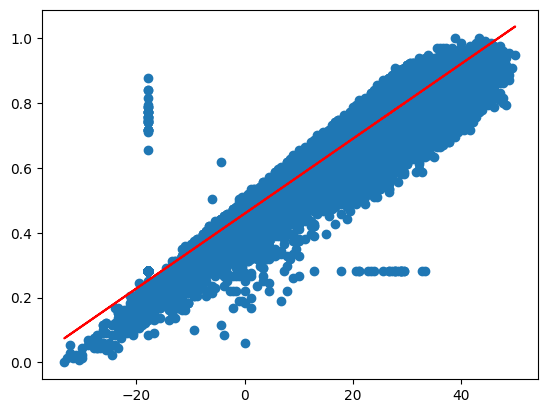

In [16]:
plt.scatter(x,t)
y = np.dot(w,x) + b
plt.plot(x,y,'r')
plt.show()

<h3>خب دیدیم که با 10 برابر کردن تعداد اجرا باعث شد تاثیر داده های پرت کمتر شود</h3>

<h1>
محاسبه میزان خطا</h1>

In [17]:
def MAE(y,t):
    return np.mean(np.abs(y-t))

MAE(t,y)

np.float64(0.04275241226533693)

<h3>
بدست آوردن رگراسیون خطی با استفاده از
sklearn.linear_model
 </h3>

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
x_data = weatherSummery[["MaxTemp"]]
t_data = weatherSummery[["MinTemp"]]

model.fit(x_data,t_data)

y_pred = (model.coef_ * x_data) + model.intercept_

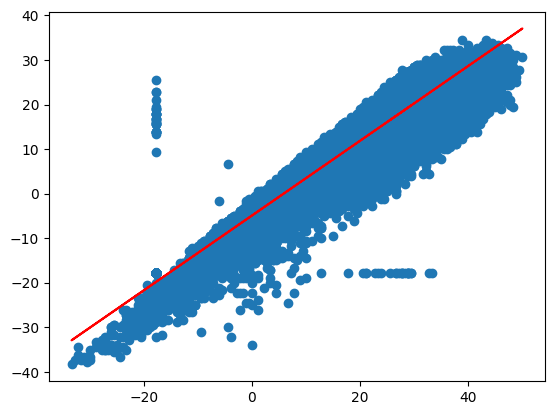

In [20]:
plt.scatter(x_data,t_data)
plt.plot(x_data,y_pred,'r')
plt.show()

<h3>میبینیم که زمانی که با توابع دست نویس دقت را افزایش دادیم به این خروجی رسیدیم و خودش در اینجا پارامتر ها را به صورت  خودکار قرار داده و برعکس خط اولی که بدست آوردیم داده های پرت تاثیر زیادی بر روی خط نگذاشته اند </h3>

In [21]:
y = y_pred.to_numpy()
t = t_data.to_numpy()
MAE(t,y)

np.float64(3.111401536611774)

<h4>دلیل تفاوت میزان خطا تفاوت نوع نرمال سازی است</h4>